# Tech Blues Capstone
## First Draft Notebook

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import wrangle
import explore
import tyler_explore

## Project Overview

## Project Planning

## Data Acquisition

In [2]:
# use our 'get_survey_data' function to bring in the data
df = wrangle.get_survey_data('survey.csv')

----------------------------------------------------
DataFrame Head
             Timestamp  Age  Gender        Country state self_employed  \
0  2014-08-27 11:29:31   37  Female  United States    IL           NaN   
1  2014-08-27 11:29:37   44       M  United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male         Canada   NaN           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interv

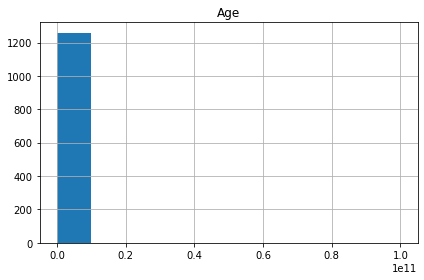

In [3]:
# Using summarize function to see head of dataframe, datatypes, amount of null values, stats, and value_counts
wrangle.summarize(df)

------

In [16]:
# checking to see if there are any duplicate rows
test_df = df.duplicated()
test_df.value_counts()

False    1259
dtype: int64

# Acquire Key Findings, Takeaways, and Next Steps:
- Good amount of nulls to drop or fill in 
- Choose to change some of the object datatypes to numeric datatype, decide what to drop, or decide what to use in modeling
- columns to encode to numeric datatype: gender, Country, self_employed, family history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys-health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence
- drop unnecassary columns: state and comments
- Since there are not unique identifiers for each observation, we cannot definitively say that each observation is a different person
- We can, however, say that there are no duplicate entries in this data set

------

## Data Preparation

In [4]:
# initial prep for object data
strings_df = wrangle.prep_the_strings(df)
strings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    object        
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    object        
 5   family_history             957 non-null    object        
 6   treatment                  957 non-null    object        
 7   work_interfere             957 non-null    object        
 8   no_employees               957 non-null    object        
 9   remote_work                957 non-null    object        
 10  tech_company               957 non-null    object        
 11  benefits                   957 non-null    object        
 12  care_op

In [5]:
# initial prep for encoding objects into integers
encoded_df = wrangle.prep_encode(strings_df)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    int64         
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    int64         
 5   family_history             957 non-null    int64         
 6   treatment                  957 non-null    int64         
 7   work_interfere             957 non-null    int64         
 8   company_size               957 non-null    int64         
 9   remote_work                957 non-null    int64         
 10  tech_company               957 non-null    int64         
 11  benefits                   957 non-null    int64         
 12  care_op

**To prep this data before exploration, the following was done:**

|   Feature      | Description    | Encoding |
| :------------- | ----------- | -----------: |
| timestamp	|  Time survey was submitted | - |
| age	| Respondent age  | - |
| gender	| Respondent gender | male:0, female:1, other:2 |
| country	 |  Respondent survey  | Only kept N America and Europe |
| self_employed	 | Whether or not they were self employed | No:0, Yes:1 |
| family_history	| Whether or not they have a family history of mental illness | No:0, Yes:1 |
| treatment	 |  Whether or not they have sought treatment  | No:0, Yes:1 |
|  work_interfere	  |  If the person felt that the mental condition interfered with work | Never:0, Rarely:1, Sometimes:2, Often:3, NA:4 |
| no_employees	| The number of employees in the company or organization  | <5:0, 6-25:1, 26-100:2, 101-500:3, 501-1000:4, >1000:5 |
| remote_work	 | Having remote work (outside of an office) at least 50% of the time | No:0, Yes:1 |
| tech_company	| The employer is primarily a tech company/organization | No:0, Yes:1 |
| benefits  |	Providing mental health benefits by the employer | No:0, Yes:1, Don't know:2 |
| care_options |	Providing options for mental health care by the employer | No:0, Yes:1, Not sure:2 |
| wellness_program	| Discussion about mental health as part of an employee wellness program by the employees | No:0, Yes:1, Don't know:2 |
| seek_help	| Provided resources by the employer to learn more about mental health issues and how to seek help | No:0, Yes:1, Don't know:2 |
| anonymity |	Protecting anonymity if you choose to take advantage of mental health or substance abuse treatment resources | No:0, Yes:1, Don't know:2 |
| leave  |	How easy is it for you to take medical leave for a mental health condition? | Very difficult:0, Somewhat difficult:1, Don't know:2, Somewhat easy:3, Very easy:4 |
| mental-health_consequence |	Having negative consequences caused by discussing a mental health issue with your employer | No:0, Yes:1, Maybe:2 |
| phys-health_consequence	 | Having negative consequences caused by discussing a physical health issue with your employer  | No:0, Yes:1, Maybe:2 |
| coworkers |	Would you be willing to discuss a mental health issue with your coworkers? | No:0, Yes:1, Some of them:2 |
| supervisor	| Would you be willing to discuss a mental health issue with your direct supervisor(s)? | No:0, Yes:1, Some of them:2 |
| mental_health_interview  |	Would you bring up a mental health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| phys_health_interview |	Would you bring up a physical health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| mental_vs_physical |	Do you feel that your employer takes mental health as seriously as physical health? | No:0, Yes:1, Don't know:2 |
|  obs_consequence  |  Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  | No:0, Yes:1 |

------

### Data Preparation Key Findings, Takeaways, and Next Steps:

- Chose to only include North America and Europe in our dataset: The economic status in these two countries are similar and this will give us more controlled variables with less bias in the data.
- The cleaning process had a moderate amount of nulls that needed to filled in or dropped 
- Deciding on what to fill nulls for each column was dependent on the column we were dealing with as you can see in the cell above.
- Initially decided to not one hot encode: will decide which columns to one hot encode once we find what features are drivers and what features are not.

------

## Data Exploration
### 1st Iteration
The first iteration will be performed on encoded data, before deciding which variables to one-hot encode before the second iteration of data exploration.

### Univariate

In [6]:
# first let's split the data...

# encoded data
encoded_train, encoded_validate, encoded_test = explore.three_split(encoded_df, 'work_interfere')

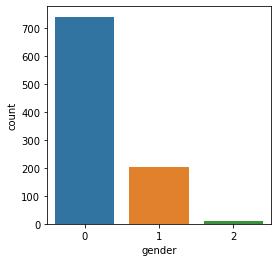

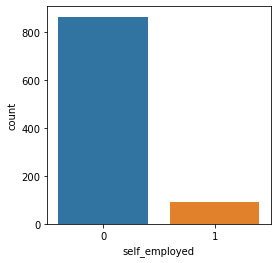

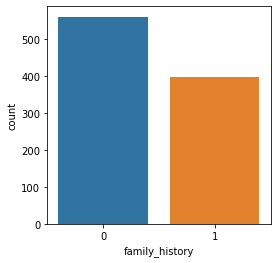

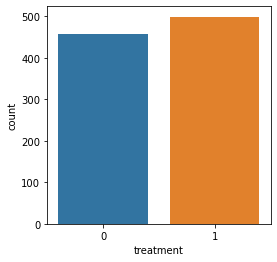

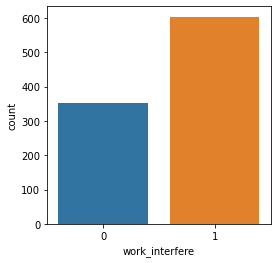

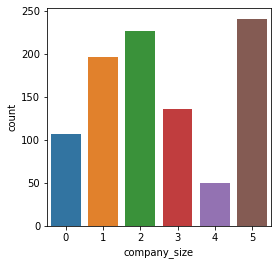

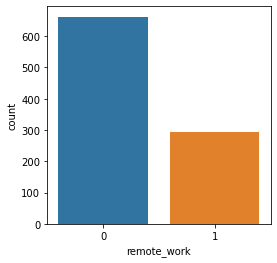

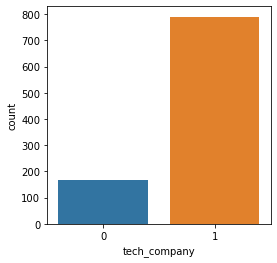

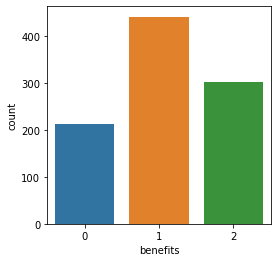

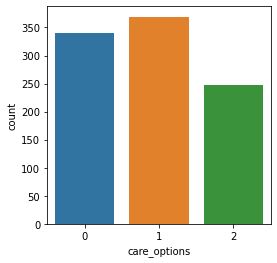

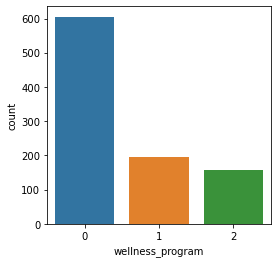

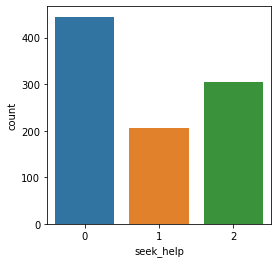

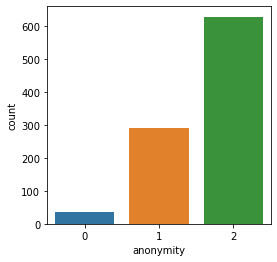

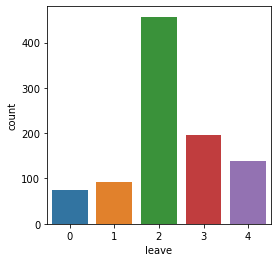

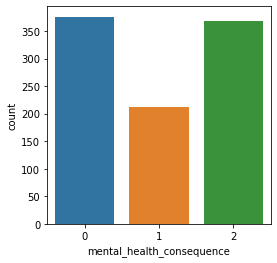

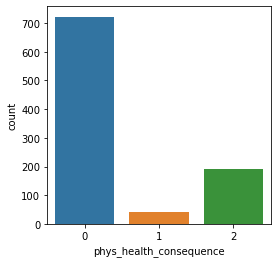

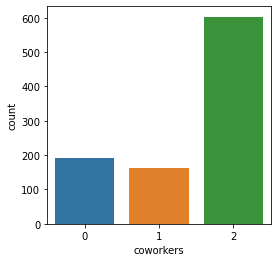

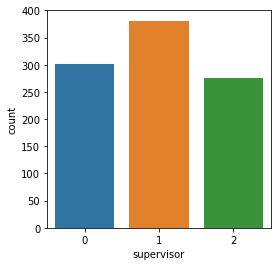

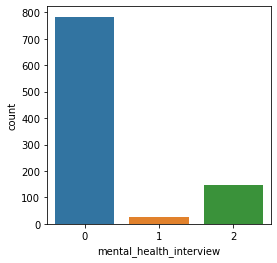

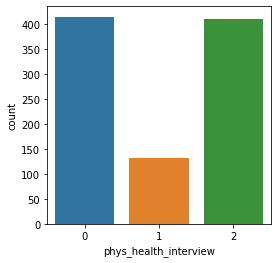

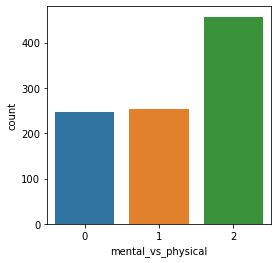

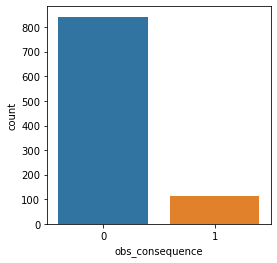

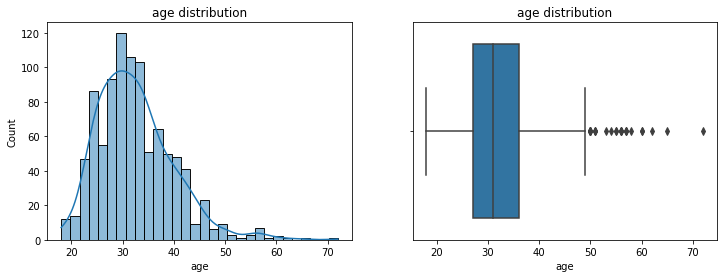

In [7]:
# countplots of categorical variables
# histograms and bosplots of continuous variables
explore.mental_health_univariate(encoded_df)

#### `Univariate 1st Iteration - Key Findings, Takeaways, and Next Steps`:

### Bivariate

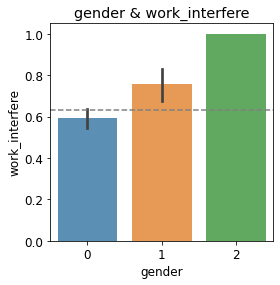


_____________________



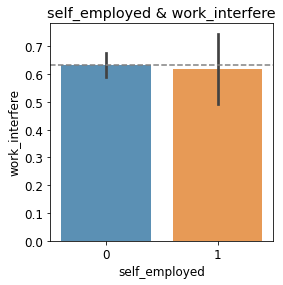


_____________________



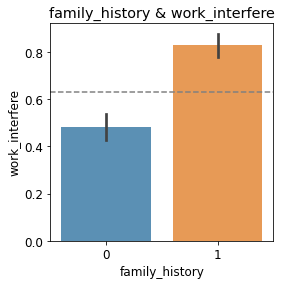


_____________________



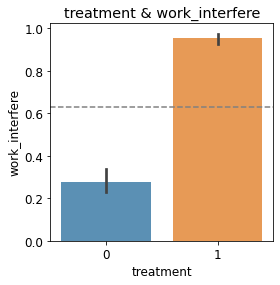


_____________________



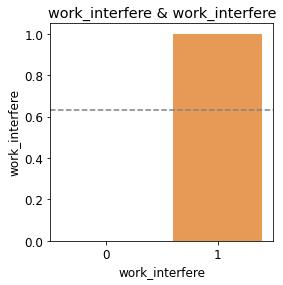


_____________________



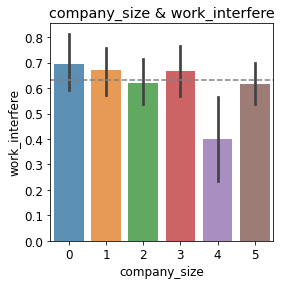


_____________________



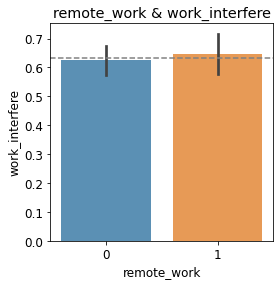


_____________________



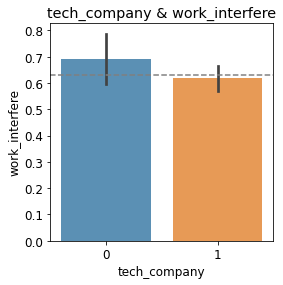


_____________________



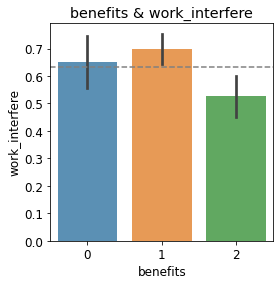


_____________________



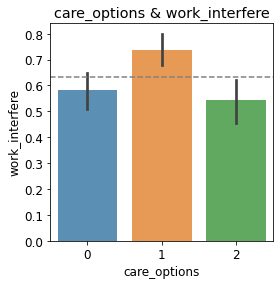


_____________________



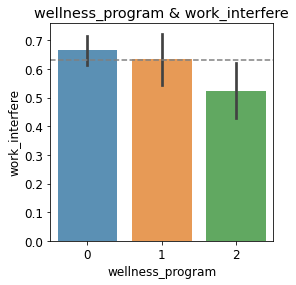


_____________________



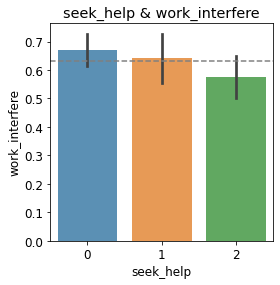


_____________________



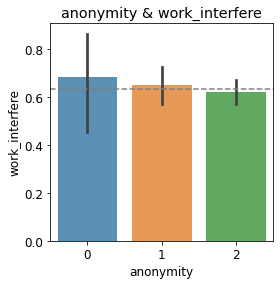


_____________________



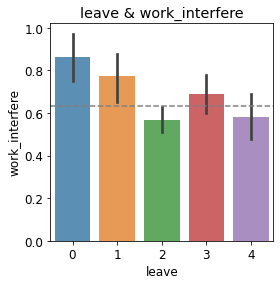


_____________________



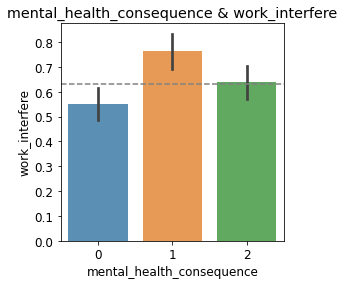


_____________________



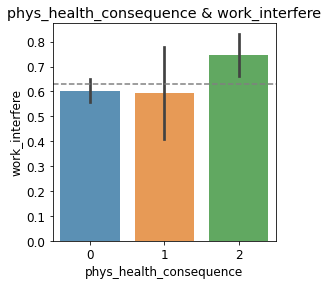


_____________________



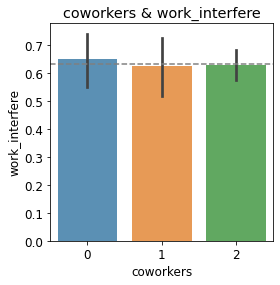


_____________________



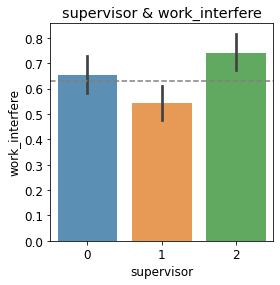


_____________________



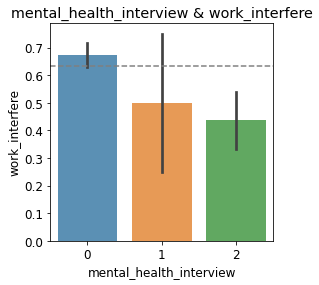


_____________________



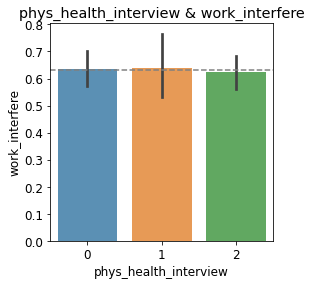


_____________________



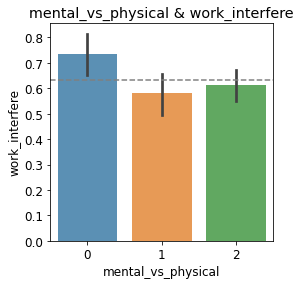


_____________________



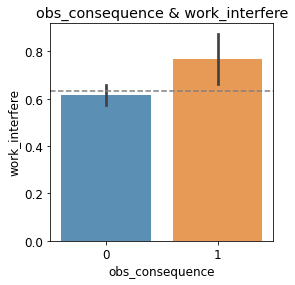


_____________________

age


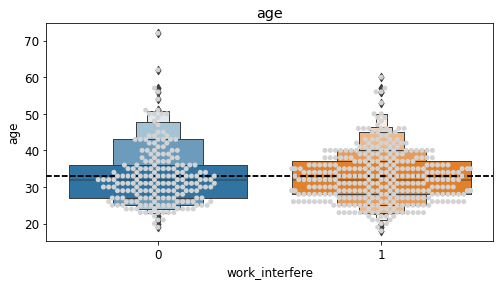

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                     variable    chi2  p-value  degrees of freedom
0              family_history   65.94   0.0000                 1.0
1                   treatment  258.60   0.0000                 1.0
2              work_interfere  530.71   0.0000                 1.0
3     mental_health_interview   18.51   0.0001                 2.0
4                care_options   16.16   0.0003                 2.0
5                  supervisor   15.60   0.0004                 2.0
6   mental_health_consequence   15.41   0.0005                 2.0
7                       leave   19.49   0.0006               

In [8]:
encoded_bi_metrics = explore.mental_health_bivariate(encoded_train, 'work_interfere')

#### Bivariate 1st Iteration - Key Findings, Takeaways, and Next Steps:

**Possible Strong Drivers (p-value <= 0.05, chi2 >)** 
- gender, family history, treatment, benefits, care options, wellness program, leave, mental health consequence, phys health consequence, supervisor, mental health interview, mental vs physical, obs consequence
- These variables all show 

**Other Observations**
- Some of the values have a "don't know" column and they all are much less than yes or no. My theory is this is because people who need to access help or resources to get help probably looked into it because it was impacting work performance. 
        - companies larger than 1000 employees seem to have the least amount of impacts to work compared to the other sized companies
        - people who feel like their employer does not consider mental health to be similar to physical health report higher rates of impact to work. 
        - Feeling comfortable talking to a supervisor also reduces the impact to work performance
        - perceiving that one would be punished for mental health also had a higher rate of impact to work performance
        - observing negative consequences to others in the company hurts work performance
        - the easier it is to get leave the less impact to work performance there is

**Worth Exploring Further**
- company size

### 2nd Iteration
The second iteration will be performed on the one-hot encoded data, before deciding what other feature engineering we would like to perform before the third iteration of data exploration.

In [9]:
# one-hot encode the data
hot_df = explore.one_hot(encoded_df)

In [10]:
# split the one-hot encoded data
hot_train, hot_validate, hot_test = explore.three_split(hot_df, 'work_interfere')

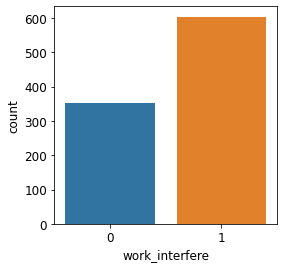

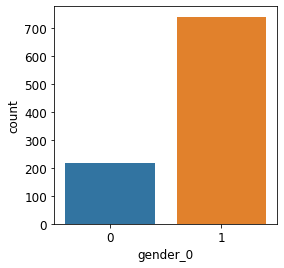

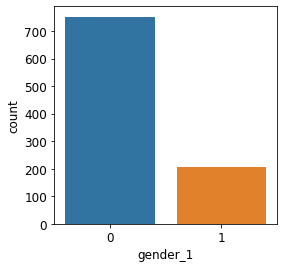

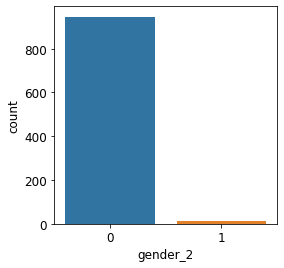

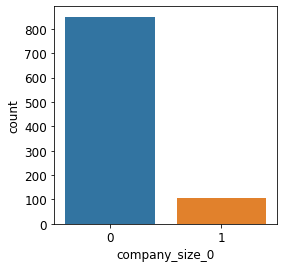

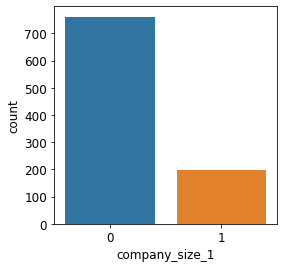

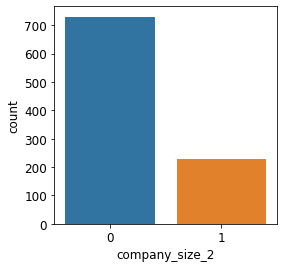

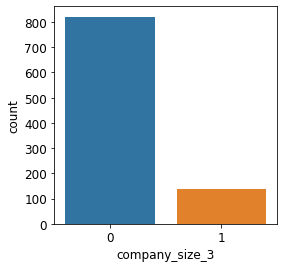

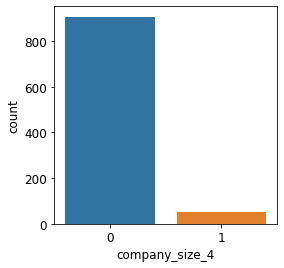

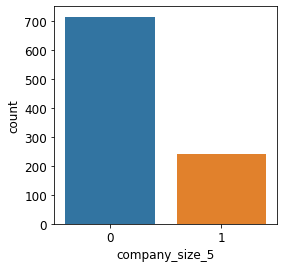

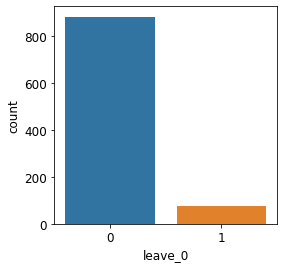

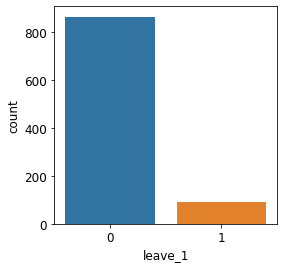

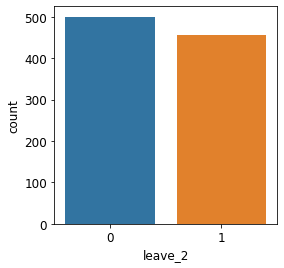

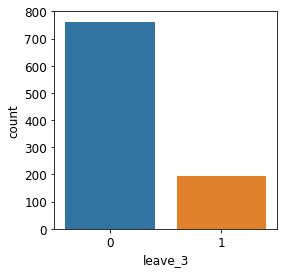

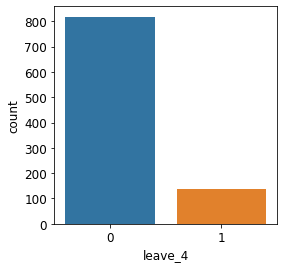

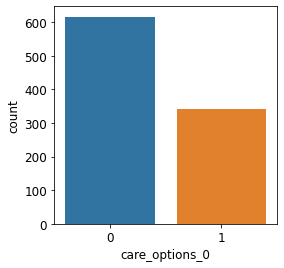

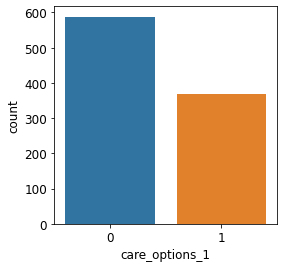

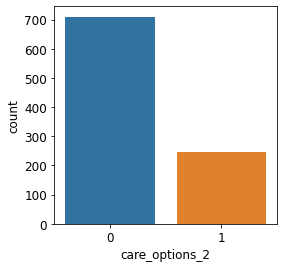

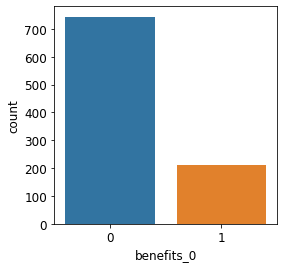

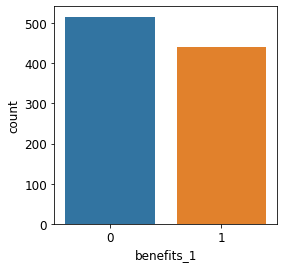

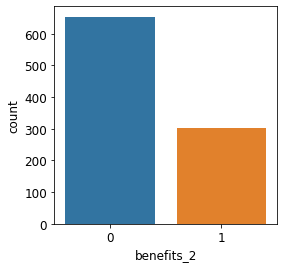

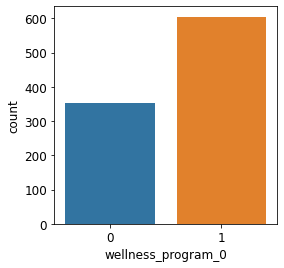

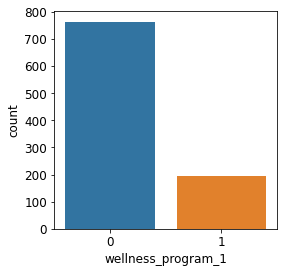

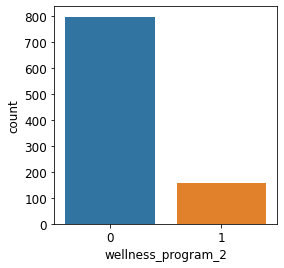

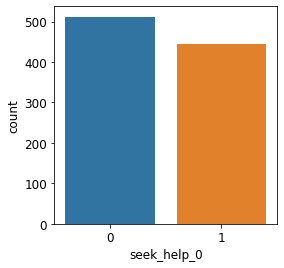

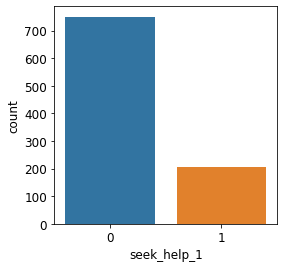

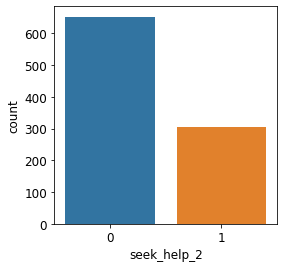

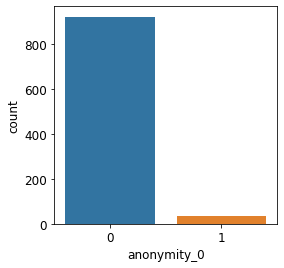

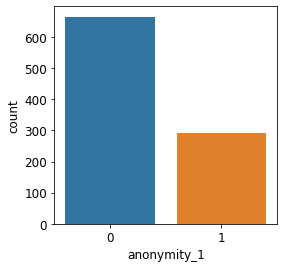

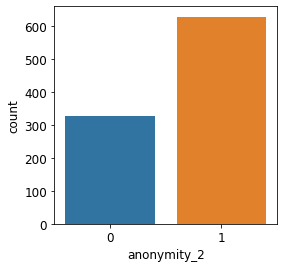

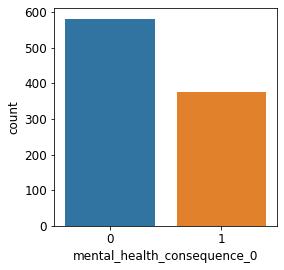

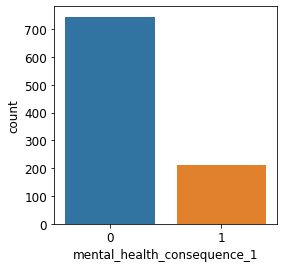

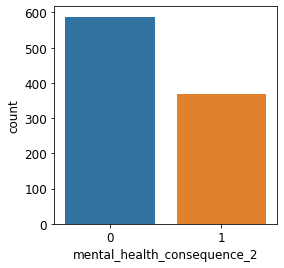

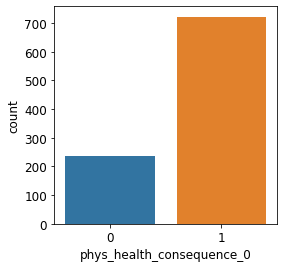

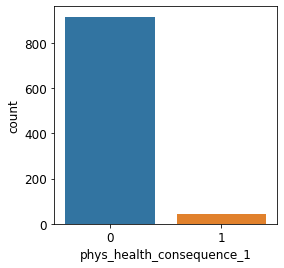

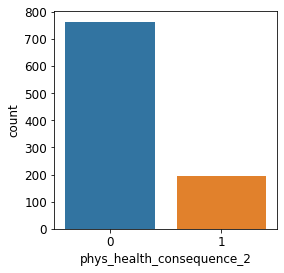

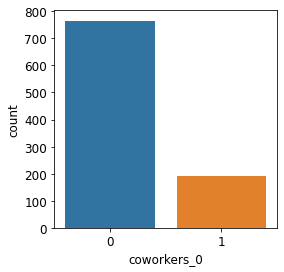

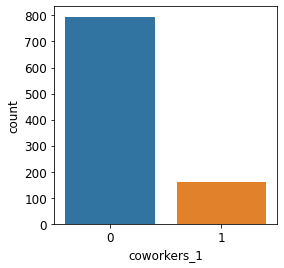

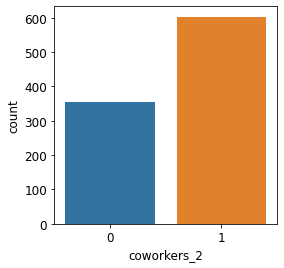

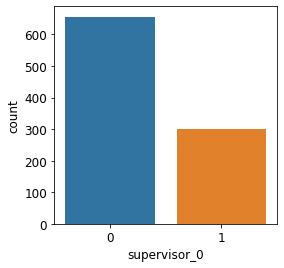

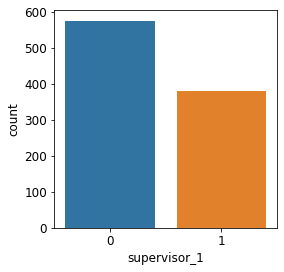

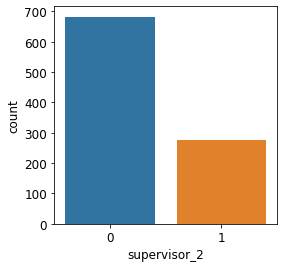

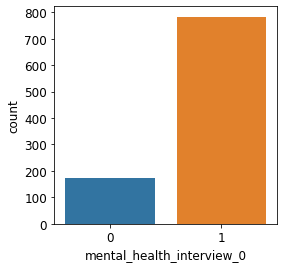

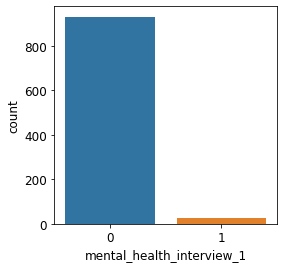

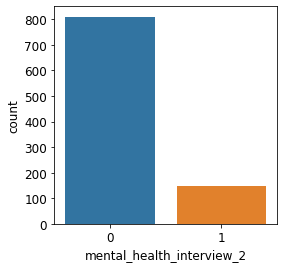

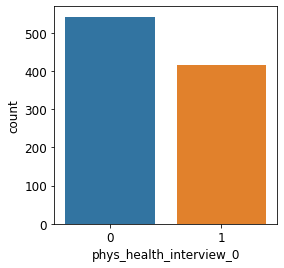

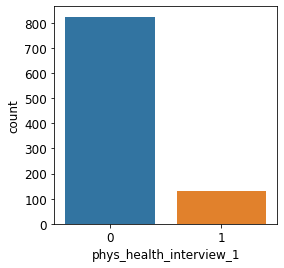

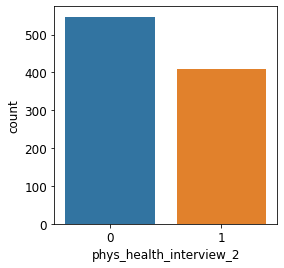

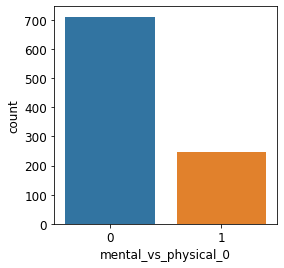

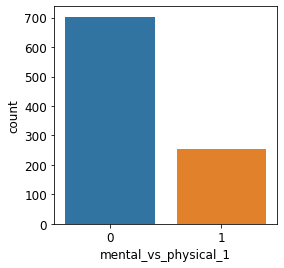

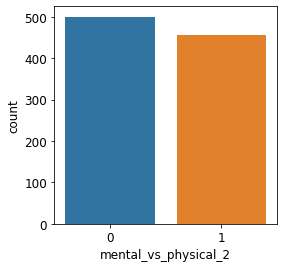

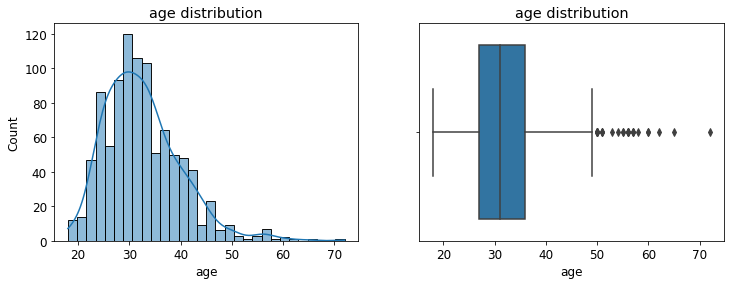

In [11]:
# univariate exploration on one-hot encoded data

explore.mental_health_univariate(hot_df)

#### Univariate 2nd Iteration - Key Findings, Takeaways, and Next Steps:
**Observations**
- age has outliers: Will need to decide if we keep age and drop outliers, keep age and do not drop outliers, or decide not use age column.
- Respondents who do not know how easy is it for them to take medical leave for a mental health condition account for at least half the respondents in the leave column.
- Respondents who are not provided resources by the employer to learn more about mental health issues and how to seek help account for at least half the respondents in the seek_help column.
- Respondents who can talk to some of their co-workers account for at least half of the respondents in the co_workers column.
- Respondents who are unsure about they feel their employer takes mental health vs physical health account for at least half the respondents in the mental_vs_physical column.

### Bivariate

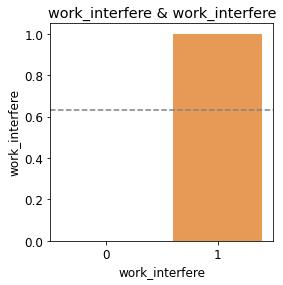


_____________________



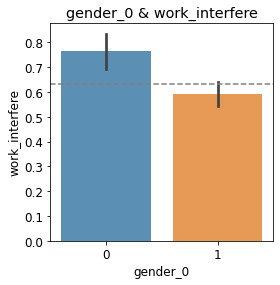


_____________________



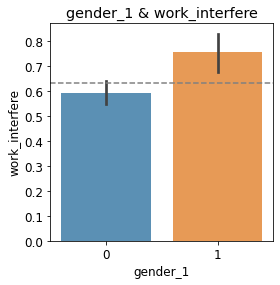


_____________________



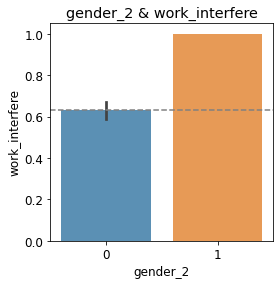


_____________________



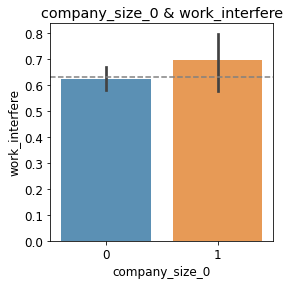


_____________________



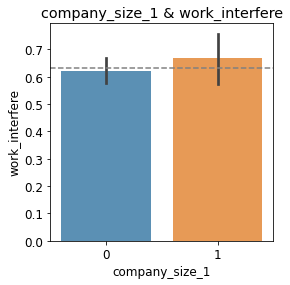


_____________________



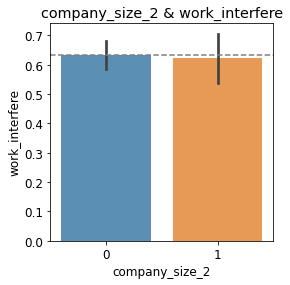


_____________________



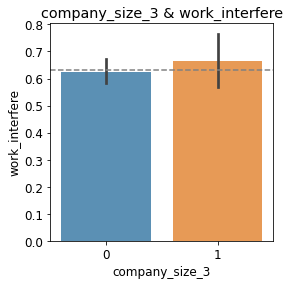


_____________________



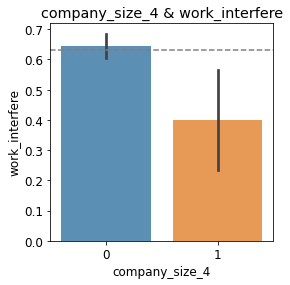


_____________________



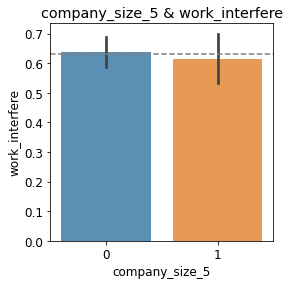


_____________________



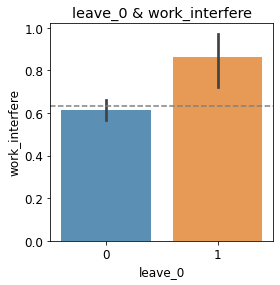


_____________________



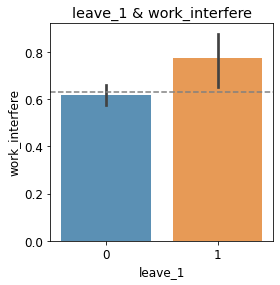


_____________________



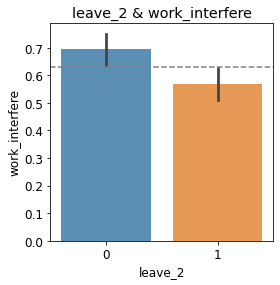


_____________________



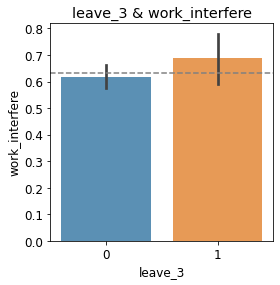


_____________________



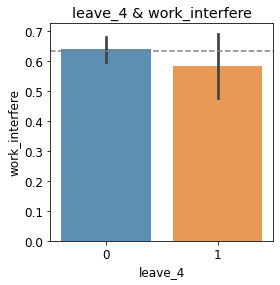


_____________________



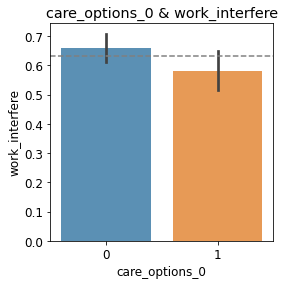


_____________________



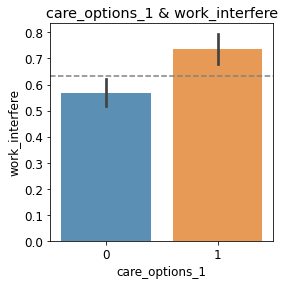


_____________________



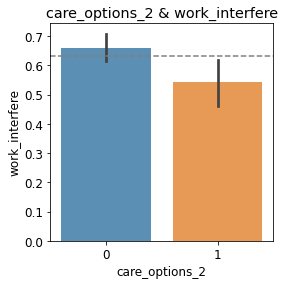


_____________________



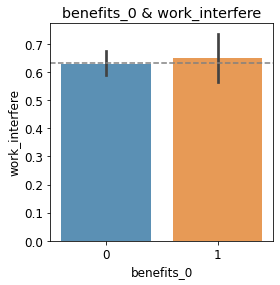


_____________________



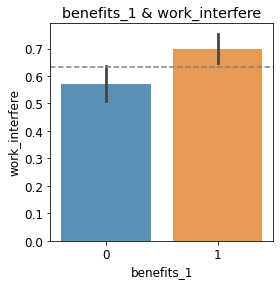


_____________________



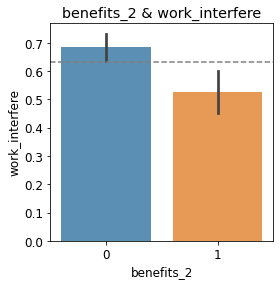


_____________________



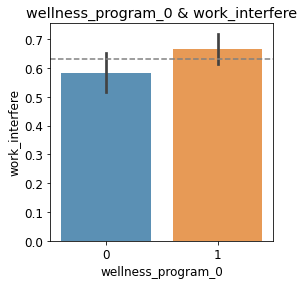


_____________________



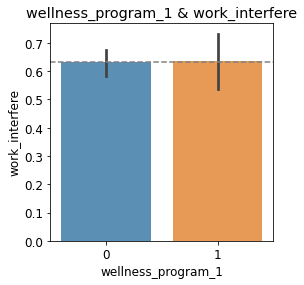


_____________________



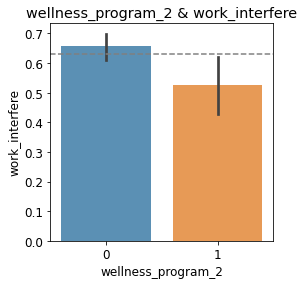


_____________________



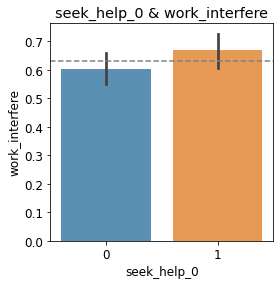


_____________________



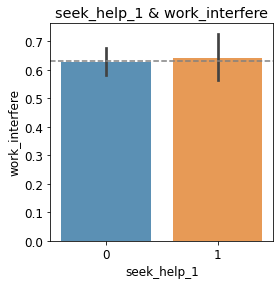


_____________________



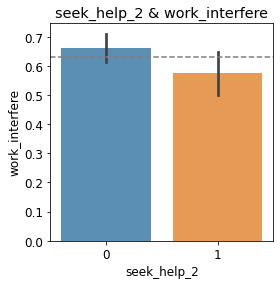


_____________________



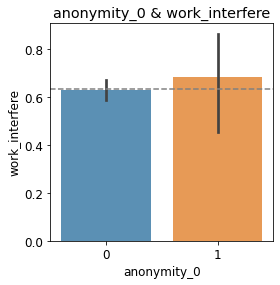


_____________________



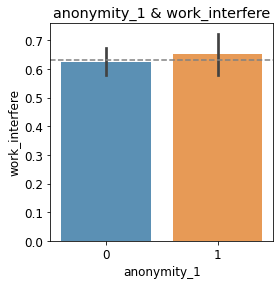


_____________________



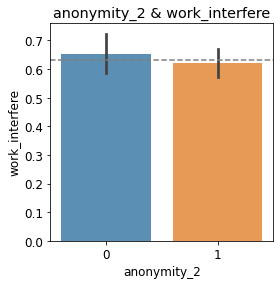


_____________________



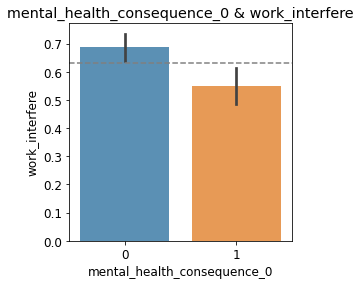


_____________________



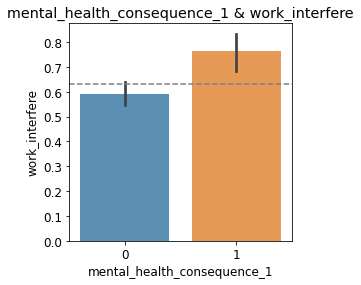


_____________________



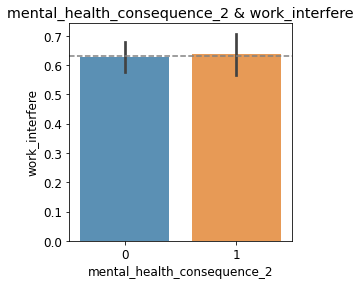


_____________________



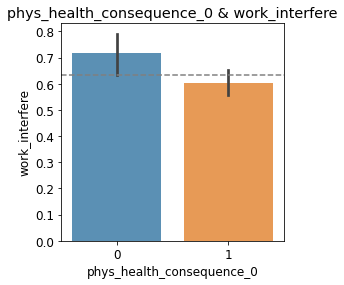


_____________________



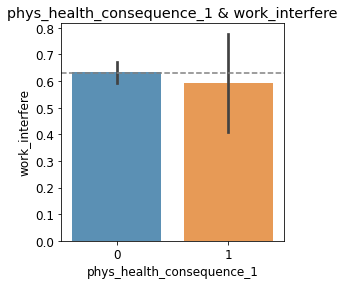


_____________________



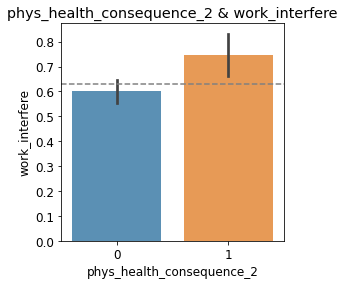


_____________________



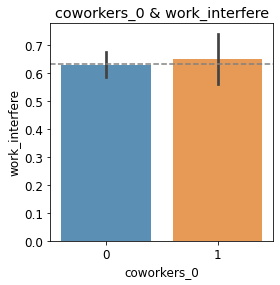


_____________________



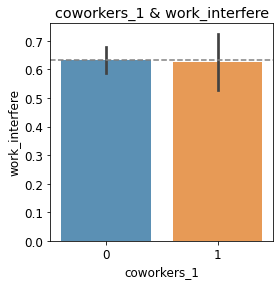


_____________________



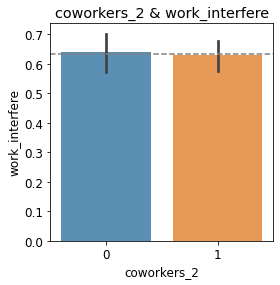


_____________________



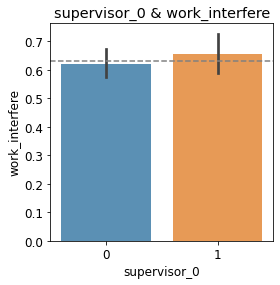


_____________________



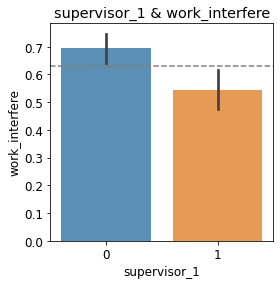


_____________________



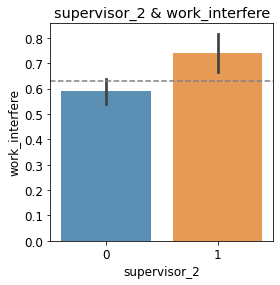


_____________________



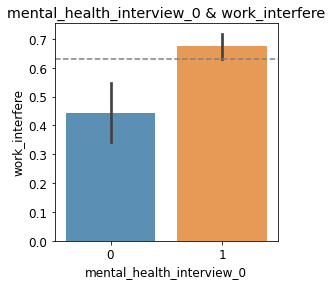


_____________________



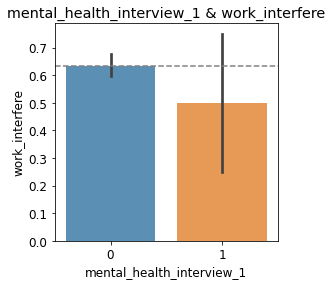


_____________________



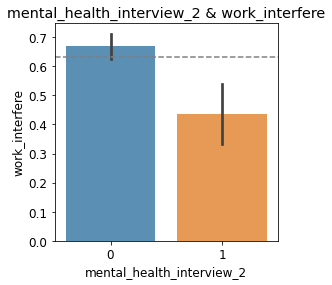


_____________________



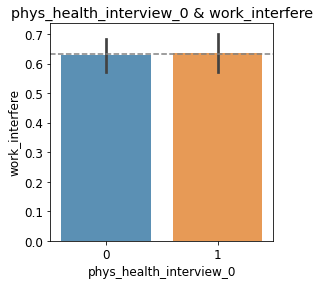


_____________________



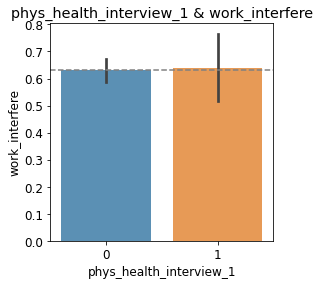


_____________________



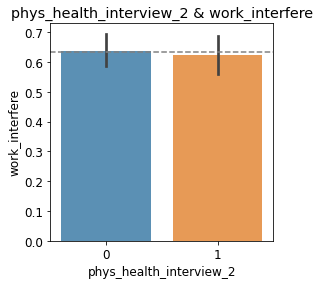


_____________________



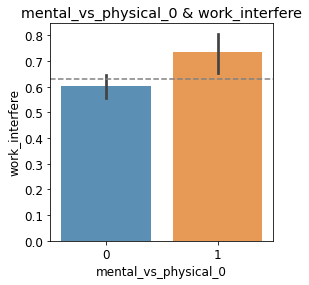


_____________________



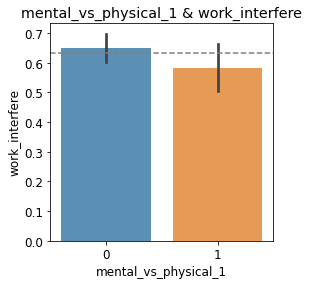


_____________________



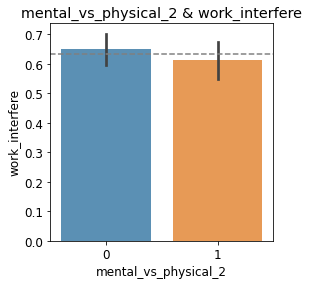


_____________________

age


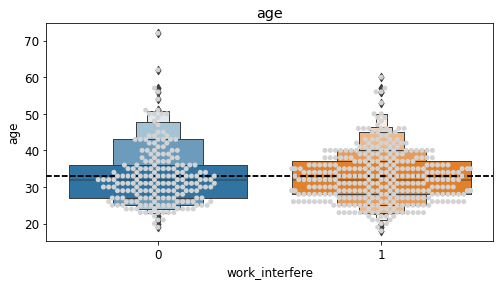

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                       variable    chi2  p-value  degrees of freedom
0                work_interfere  530.71   0.0000                 1.0
1     mental_health_interview_0   17.35   0.0000                 1.0
2     mental_health_interview_2   15.99   0.0001                 1.0
3                care_options_1   14.97   0.0001                 1.0
4                  supervisor_1   12.42   0.0004                 1.0
5                    benefits_2   12.19   0.0005                 1.0
6                      gender_0   11.74   0.0006                 1.0
7   mental_health_consequence_1   11.28   0.0

In [12]:
hot_bi_metrics = explore.mental_health_bivariate(hot_train, 'work_interfere')

#### Bivariate 2nd Iteration - Key Findings, Takeaways, and Next Steps:

**Possible Strong Drivers (p-value <= 0.05, chi2 >)** 
- Top 5: 
    - Respondents who would either maybe or not bring up mental health issues with an employed in an interview.
    - Respondents who know about their care options for mental health care
    - Respondents who are feel comfortable speaking to their supervisor
    - Respondents who are provided with mental health
    - Respondents who think that discussing a mental health issue with your employer would have negative consequences.

### Multivariate

#### Multivariate - Key Findings, Takeaways, and Next Steps:

### Hypothesis Testing
#### Target Variable: 'work_interfere'

#### Hypothesis 1: 'Supervisor'
- alpha : 0.05
- ${H_0}$: The mean workplace interference is the same for those who feel comfortable speaking with their supervisor about mental health issues, and those who do not feel comfortable.
- ${H_a}$: The mean workplace interference is different for those who feel comfortable speaking with their supervisor about mental health issues than those who do not feel comfortable communicating those issues with their supervisor.

In [13]:
# Here is the work for hypothesis 1
explore.ty_chi(encoded_train, 'work_interfere', 'supervisor')

work_interfere & supervisor chi2 test results

chi^2 = 15.60
    p = 0.0004


#### Hypothesis 1 - Key Findings, Takeaways, and Next Steps:
- 'Supervisor'
- Since the p-value is less than alpha, we can reject the null hypothesis. There is evidence to suggest a relationship between an employee feeling comfortable speaking with a supervisor about personal mental health issues and work interference.

#### Hypothesis 2: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [14]:
# Here is the work for hypothesis 2

#### Hypothesis 2 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 3: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [15]:
# Here is the work for hypothesis 3

#### Hypothesis 3 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 4: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 5: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 6: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 7: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 8: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 9: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 10: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

------

### Explore Key Findings, Takeaways, and Next Steps:

------

## Modeling

### Initital Setup

In [47]:
# calculate baseline model using mean
encoded_df['baseline'] = 1
baseline_accuracy = (encoded_df.baseline == encoded_df.work_interfere).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 63.11%


In [48]:
# encode the top 9 variables as decided by p value with chi2 with degrees of freedom >1
dum_df = pd.get_dummies(data = encoded_df, columns = ['mental_health_interview','care_options','supervisor',
                                'mental_health_consequence','leave', 'benefits','gender'], drop_first = True)

In [49]:
# drop the unecessary columns
dum_df = dum_df.drop(columns = ['age', 'self_employed', 'company_size', 'remote_work', 
                               'tech_company', 'wellness_program','seek_help', 
                               'anonymity', 'phys_health_consequence', 'coworkers',
                               'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 
                               'baseline', 'timestamp', 'country'])

In [67]:
from imblearn import over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import explore, evaluate
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

In [51]:
# set up the random over sampler for class imbalance
ros = over_sampling.RandomOverSampler(random_state = 123)

In [52]:
# do the splits
X_train, y_train, X_validate, y_validate, X_test, y_test = explore.full_split(dum_df, 'work_interfere')

In [56]:
# create resampled data for training set
X_res, y_res = ros.fit_resample(X_train, y_train)

In [57]:
X_res.columns

Index(['family_history', 'treatment', 'mental_health_interview_1',
       'mental_health_interview_2', 'care_options_1', 'care_options_2',
       'supervisor_1', 'supervisor_2', 'mental_health_consequence_1',
       'mental_health_consequence_2', 'leave_1', 'leave_2', 'leave_3',
       'leave_4', 'benefits_1', 'benefits_2', 'gender_1', 'gender_2'],
      dtype='object')

### Model 1: Decision Tree

In [59]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3).fit(X_res,y_res)

In [60]:
evaluate.run_metrics(X_res, y_res, tree, 'Train')

Train data set accuracy score: 86.98%
Train data set precision score 94.01%
Train data set recall score: 78.99%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       338
           1       0.94      0.79      0.86       338

    accuracy                           0.87       676
   macro avg       0.88      0.87      0.87       676
weighted avg       0.88      0.87      0.87       676

-------------------------------

confusion matrix
[[321  17]
 [ 71 267]]

Train data set model metrics
---------------------------------
True positive rate for the model is 78.99%
False positive rate for the model is  5.03%
True negative rate for the model is 94.97%
False negative rate for the model is 21.01%



In [61]:
evaluate.run_metrics(X_validate, y_validate, tree, 'Validation')

Validation data set accuracy score: 82.17%
Validation data set precision score 94.83%
Validation data set recall score: 75.86%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        85
           1       0.95      0.76      0.84       145

    accuracy                           0.82       230
   macro avg       0.82      0.84      0.82       230
weighted avg       0.85      0.82      0.82       230

-------------------------------

confusion matrix
[[ 79   6]
 [ 35 110]]

Validation data set model metrics
---------------------------------
True positive rate for the model is 75.86%
False positive rate for the model is  7.06%
True negative rate for the model is 92.94%
False negative rate for the model is 24.14%



#### Model 1: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 2: Random Forest Classifier

In [62]:
rfc = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                       random_state=123).fit(X_res, y_res)

In [63]:
evaluate.run_metrics(X_res, y_res, rfc, 'Train')

Train data set accuracy score: 88.31%
Train data set precision score 94.20%
Train data set recall score: 81.66%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       338
           1       0.94      0.82      0.87       338

    accuracy                           0.88       676
   macro avg       0.89      0.88      0.88       676
weighted avg       0.89      0.88      0.88       676

-------------------------------

confusion matrix
[[321  17]
 [ 62 276]]

Train data set model metrics
---------------------------------
True positive rate for the model is 81.66%
False positive rate for the model is  5.03%
True negative rate for the model is 94.97%
False negative rate for the model is 18.34%



In [64]:
evaluate.run_metrics(X_validate, y_validate, rfc, 'Validate')

Validate data set accuracy score: 83.04%
Validate data set precision score 94.92%
Validate data set recall score: 77.24%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.71      0.93      0.80        85
           1       0.95      0.77      0.85       145

    accuracy                           0.83       230
   macro avg       0.83      0.85      0.83       230
weighted avg       0.86      0.83      0.83       230

-------------------------------

confusion matrix
[[ 79   6]
 [ 33 112]]

Validate data set model metrics
---------------------------------
True positive rate for the model is 77.24%
False positive rate for the model is  7.06%
True negative rate for the model is 92.94%
False negative rate for the model is 22.76%



#### Model 2: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 3: [insert model name here]

In [68]:
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.25, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None).fit(X_res, y_res)

[17:11:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:
evaluate.run_metrics(X_res, y_res, xgbc, 'Train')

Train data set accuracy score: 92.75%
Train data set precision score 95.87%
Train data set recall score: 89.35%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       338
           1       0.96      0.89      0.92       338

    accuracy                           0.93       676
   macro avg       0.93      0.93      0.93       676
weighted avg       0.93      0.93      0.93       676

-------------------------------

confusion matrix
[[325  13]
 [ 36 302]]

Train data set model metrics
---------------------------------
True positive rate for the model is 89.35%
False positive rate for the model is  3.85%
True negative rate for the model is 96.15%
False negative rate for the model is 10.65%



In [71]:
evaluate.run_metrics(X_validate, y_validate, xgbc, 'Validate')

Validate data set accuracy score: 81.30%
Validate data set precision score 86.96%
Validate data set recall score: 82.76%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        85
           1       0.87      0.83      0.85       145

    accuracy                           0.81       230
   macro avg       0.80      0.81      0.80       230
weighted avg       0.82      0.81      0.81       230

-------------------------------

confusion matrix
[[ 67  18]
 [ 25 120]]

Validate data set model metrics
---------------------------------
True positive rate for the model is 82.76%
False positive rate for the model is  21.18%
True negative rate for the model is 78.82%
False negative rate for the model is 17.24%



#### Model 3: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 4: Multi-layer Perceptron Classifier

In [72]:
mlp = MLPClassifier(random_state=123, max_iter=300).fit(X_res, y_res)

In [73]:
evaluate.run_metrics(X_res, y_res, mlp, 'train')

train data set accuracy score: 92.01%
train data set precision score 94.94%
train data set recall score: 88.76%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       338
           1       0.95      0.89      0.92       338

    accuracy                           0.92       676
   macro avg       0.92      0.92      0.92       676
weighted avg       0.92      0.92      0.92       676

-------------------------------

confusion matrix
[[322  16]
 [ 38 300]]

train data set model metrics
---------------------------------
True positive rate for the model is 88.76%
False positive rate for the model is  4.73%
True negative rate for the model is 95.27%
False negative rate for the model is 11.24%



In [74]:
evaluate.run_metrics(X_validate, y_validate, mlp, 'train')

train data set accuracy score: 82.17%
train data set precision score 89.39%
train data set recall score: 81.38%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        85
           1       0.89      0.81      0.85       145

    accuracy                           0.82       230
   macro avg       0.81      0.82      0.81       230
weighted avg       0.83      0.82      0.82       230

-------------------------------

confusion matrix
[[ 71  14]
 [ 27 118]]

train data set model metrics
---------------------------------
True positive rate for the model is 81.38%
False positive rate for the model is  16.47%
True negative rate for the model is 83.53%
False negative rate for the model is 18.62%



#### Model 4: [insert model name here] - Key Findings, Takeaways, and Next Steps:

------

### Modeling Key Findings, Takeaways, and Next Steps:

------

### Summary - Key Findings, Takeaways, and Next Steps:

------